In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch 
from torch import nn
from collections import Counter
import numpy as np
from model.KAN import KAN
from torch.utils.data import DataLoader
from torchvision import transforms

In [2]:
from dataset import Capture_128
data = Capture_128(root="dataset/Capture_train_128.feather", isTrain=False)
pd.DataFrame(data.samples)

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.011765,0.921569,0.686275,0.337255,0.952941,0.152941,0.266667,0.050980,0.094118,0.694118,...,0.298039,0.286275,0.678431,0.203922,0.666667,0.090196,0.541176,0.749020,0.168627,0.552941
1,0.011765,0.921569,0.686275,0.729412,0.164706,0.286275,0.909804,0.298039,0.317647,0.745098,...,0.764706,0.658824,0.623529,0.792157,0.082353,0.603922,0.439216,0.082353,0.337255,0.764706
2,0.011765,0.921569,0.686275,0.772549,0.023529,0.784314,0.474510,0.015686,0.862745,0.333333,...,0.639216,0.733333,0.956863,0.400000,0.650980,0.788235,0.470588,0.960784,0.109804,0.250980
3,0.011765,0.921569,0.686275,0.266667,0.505882,0.207843,0.980392,0.733333,0.494118,0.631373,...,0.584314,0.341176,0.098039,0.839216,0.266667,0.972549,0.027451,0.905882,0.215686,0.196078
4,0.011765,0.921569,0.686275,0.466667,0.486275,0.827451,0.435294,0.933333,0.368627,0.494118,...,0.149020,0.831373,0.376471,0.125490,0.909804,0.819608,0.047059,0.960784,0.682353,0.713725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329655,0.090196,0.011765,0.011765,0.000000,0.207843,0.901961,0.894118,0.447059,0.823529,0.266667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
329656,0.090196,0.011765,0.011765,0.003922,0.584314,0.556863,0.180392,0.458824,0.862745,0.207843,...,0.596078,0.192157,0.976471,0.247059,0.235294,0.890196,0.439216,0.360784,0.317647,0.698039
329657,0.090196,0.011765,0.011765,0.000000,0.941176,0.996078,0.427451,0.407843,0.831373,0.682353,...,0.988235,0.380392,0.600000,0.231373,0.847059,0.639216,0.729412,0.811765,0.811765,0.686275
329658,0.090196,0.011765,0.011765,0.019608,0.450980,0.780392,0.666667,0.556863,0.474510,0.545098,...,0.364706,0.529412,0.780392,0.686275,0.235294,0.705882,0.552941,0.278431,0.635294,0.682353


In [7]:
l = data.labels.tolist()
l

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


In [5]:
pd.DataFrame(data.samples).head(10)

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.011765,0.921569,0.686275,0.337255,0.952941,0.152941,0.266667,0.050980,0.094118,0.694118,...,0.298039,0.286275,0.678431,0.203922,0.666667,0.090196,0.541176,0.749020,0.168627,0.552941
1,0.011765,0.921569,0.686275,0.729412,0.164706,0.286275,0.909804,0.298039,0.317647,0.745098,...,0.764706,0.658824,0.623529,0.792157,0.082353,0.603922,0.439216,0.082353,0.337255,0.764706
2,0.011765,0.921569,0.686275,0.772549,0.023529,0.784314,0.474510,0.015686,0.862745,0.333333,...,0.639216,0.733333,0.956863,0.400000,0.650980,0.788235,0.470588,0.960784,0.109804,0.250980
3,0.011765,0.921569,0.686275,0.266667,0.505882,0.207843,0.980392,0.733333,0.494118,0.631373,...,0.584314,0.341176,0.098039,0.839216,0.266667,0.972549,0.027451,0.905882,0.215686,0.196078
4,0.011765,0.921569,0.686275,0.466667,0.486275,0.827451,0.435294,0.933333,0.368627,0.494118,...,0.149020,0.831373,0.376471,0.125490,0.909804,0.819608,0.047059,0.960784,0.682353,0.713725
5,0.011765,0.921569,0.686275,0.937255,0.564706,0.078431,0.219608,0.050980,0.035294,0.517647,...,0.992157,0.196078,0.301961,0.447059,0.847059,0.403922,0.223529,0.725490,0.286275,0.996078
6,0.011765,0.921569,0.686275,0.345098,0.858824,0.901961,0.960784,0.462745,0.717647,0.901961,...,0.639216,0.192157,0.137255,0.796078,0.227451,0.447059,0.788235,0.964706,0.180392,0.792157
7,0.011765,0.921569,0.686275,0.164706,0.662745,0.109804,0.129412,0.607843,0.713725,0.101961,...,0.843137,0.768627,0.862745,0.478431,0.509804,0.949020,0.976471,0.980392,0.149020,1.000000
8,0.835294,0.850980,0.090196,0.588235,0.101961,0.458824,0.564706,0.949020,0.682353,0.784314,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.011765,0.921569,0.686275,0.803922,0.113725,0.525490,0.890196,0.654902,0.941176,0.635294,...,0.525490,0.878431,0.870588,0.705882,0.796078,0.094118,0.462745,0.078431,0.058824,0.690196


In [ ]:
freq = [0 for _ in range(13)]
for i in data.labels:
    freq[i]+=1 
print(freq)

[5660, 3340, 6960, 840, 7400, 4600, 24340, 10180, 1780, 5080, 1020, 3940, 7280]


In [5]:
print(sum(freq)/len(freq))

6340.0


Text(0.5, 1.0, 'Capture_train_128')

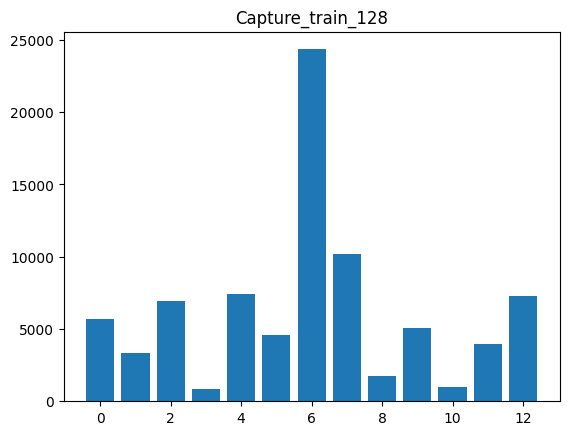

In [4]:
plt.bar(range(0,len(freq),1), freq)
plt.title("Capture_train_128")

In [ ]:
dataset = pd.read_feather('dataset/Capture_test_128.feather')
labels = dataset.iloc [:,-1]
labels.value_counts()

Label
6     24340
7     10180
4      7400
12     7280
2      6960
0      5660
9      5080
5      4600
11     3940
1      3340
8      1780
10     1020
3       840
Name: count, dtype: int64